# **Ismael Domínguez Olalde**
## Mercado de Derivados
## Análisis de las 10 compañías con mejor performance en el S&P 500.

# S&P 500
El Standard & Poor´s 500 (S&P 500) es un bursátil, desarrollado por la calificadora con el mismo nombre. Durante los últimos años se ha afianzado dentro de los financieros, a la hora de evaluar situaciones en el mercado financiero estadounidense. Este índice es uno de los índices más importantes de la economía estadounidense, ya que este representa la capitalización de las 500 empresas más grandes en cotización en la bolsa de valores (NYSE o NASDAQ).

Este índice es una representación del mercado financiero de Estados Unidos, a diferencia DEL índice Dow Jones que, al tener solo 30 empresas dentro de su índice, la variación de una de losa activos financieros de sus empresas, tiene un mayor impacto en las demás compañías. El S&P 500, se analiza desde un punto de vista de mercado ya que la variación de una de las empresas más importantes del índice, significa una variación en el mismo índice (representación del mercado) que de su acción menos significativa.

In [25]:
# Instalamos las paqueterias necesarias

import numpy as np
from numpy import linalg as LA
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('bmh')

import scipy.optimize as sci_opt
from scipy import stats
from scipy.stats import skew, kurtosis, norm, chi2

from yahoo_fin.stock_info import *
import yfinance as yf

from pprint import pprint
from sklearn.preprocessing import StandardScaler

from pandas_datareader import data as wb
from yahoo_fin.stock_info import *

import scipy.stats
from pandas.util._decorators import Appender

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess          # para simular proceso ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

#from pmdarima.arima import auto_arima
import arch

import matplotlib.pyplot as plt
import plotly.graph_objects as go

#from ta.trend import SMAIndicator
#from ta.trend import EMAIndicator

import random
random.seed(10)

# las paqueterías que se encuentran con "#" son las que no utilizamos en esta investigación, pero si se necesita llevar más allá se pueden utilizar.

In [4]:
# Instalamos las paqueterías que no pudimos descargar.
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 7.6 MB/s eta 0:00:00


Para recopilar los datos a analizar, vamos a obtenerlos de una página web, en este caso de Wikipedia.
Se pueden utilizar tablas que encontramos en páginas web de la siguiente manera.

In [26]:
sp500url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
data_table = pd.read_html(sp500url)
data_table

[    Symbol            Security             GICS Sector  \
 0      MMM                  3M             Industrials   
 1      AOS         A. O. Smith             Industrials   
 2      ABT              Abbott             Health Care   
 3     ABBV              AbbVie             Health Care   
 4      ACN           Accenture  Information Technology   
 ..     ...                 ...                     ...   
 498    XYL          Xylem Inc.             Industrials   
 499    YUM         Yum! Brands  Consumer Discretionary   
 500   ZBRA  Zebra Technologies  Information Technology   
 501    ZBH       Zimmer Biomet             Health Care   
 502    ZTS              Zoetis             Health Care   
 
                                 GICS Sub-Industry    Headquarters Location  \
 0                        Industrial Conglomerates    Saint Paul, Minnesota   
 1                               Building Products     Milwaukee, Wisconsin   
 2                           Health Care Equipment  N

Visualicemos que forma tienen la variable creada.

In [27]:
type(data_table)

list

Podemos ver que se cuenta con 6 tablas dentro de esta página web, recordemos que en Python al listar cualquier cosa se empieza desde el número 0, y como la tabla que nos interesa es la primera del sitio web, entonces creamos una variable para extraerla.

In [28]:
# Creamos una variable que tenga en forma de lista los datos obtenidos en la primera tabla en la columna "Symbol".
tickers = data_table[0]["Symbol"].tolist()
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

Como nada más nos interesan las dos primeras columnas de la primera tabla, entonces, creamos una variable donde agreguemos estas dos columnas solamente.

In [29]:
tickers_info = data_table[0][["Symbol", "GICS Sector"]].copy()
tickers_info

,Symbol,GICS Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology
...,...,...
498,XYL,Industrials
499,YUM,Consumer Discretionary
500,ZBRA,Information Technology
501,ZBH,Health Care


In [30]:
tickers_info.rename(columns={"Symbol": "Ticker", "GICS Sector": "Sector"}, inplace=True)
tickers_info

,Ticker,Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology
...,...,...
498,XYL,Industrials
499,YUM,Consumer Discretionary
500,ZBRA,Information Technology
501,ZBH,Health Care


In [31]:
# Descargamos de Yahoo finance los precios de cierre que obtuvieron las variables de nuestra tabla.
SP_prices = yf.download(tickers, start="2021-01-01", end="2023-08-06")["Adj Close"]
SP_prices

[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
5 Failed downloads:
ERROR:yfinance:['VLTO', 'GEV', 'SOLV']: Exception("%ticker%: Data doesn't exist for startDate = 1609477200, endDate = 1691294400")
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-01-01 -> 2023-08-06)')
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,116.195976,15.13,127.002098,92.173615,139.149994,103.105186,34.900002,245.115570,485.339996,137.673996,...,194.640976,28.258772,105.816551,59.437870,36.027855,95.948219,99.727760,145.117615,378.130005,159.686432
2021-01-05,117.145996,15.43,128.572311,93.126740,148.300003,104.380890,35.040001,246.511002,485.690002,140.134842,...,193.016556,28.525763,109.073204,58.858524,37.764141,95.832726,99.737183,147.628464,380.570007,160.799210
2021-01-06,120.358437,15.52,124.244377,92.322266,142.770004,104.163551,36.580002,249.206223,466.309998,140.766556,...,194.640976,28.672184,109.726517,60.162064,38.727772,99.875076,100.283798,151.835327,394.820007,163.161469
2021-01-07,123.561073,15.38,128.484024,93.310364,151.270004,105.174675,36.240002,251.557495,477.739990,146.715866,...,196.122009,28.947798,108.637665,58.985256,39.031631,104.408295,99.520439,150.935226,409.100006,163.015045
2021-01-08,124.442520,15.13,129.592957,93.800041,149.770004,105.467606,36.439999,252.475006,485.100006,147.781281,...,194.583618,28.749699,107.924957,59.528397,39.465698,103.349594,100.981209,150.603607,405.470001,164.098602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,121.123016,16.75,195.677261,146.696045,152.190002,110.184814,77.690002,313.897156,546.169983,196.727707,...,209.078918,33.324871,108.120575,60.993530,104.433632,111.693855,135.703796,137.318008,307.959991,187.216110
2023-08-01,121.829247,16.23,194.840561,145.676086,148.910004,109.393036,77.099998,318.481323,549.099976,196.678391,...,210.335403,33.236813,108.279305,61.110207,103.829865,110.881546,134.412506,131.473434,254.770004,184.648102
2023-08-02,127.031464,15.95,191.822495,146.499908,144.559998,107.502686,77.360001,315.316040,530.299988,189.757019,...,210.889420,32.483433,104.330704,61.139378,102.534668,111.030144,133.071930,127.606850,241.149994,181.154419


In [32]:
# guardamos los faltantes para despues eliminar los faltantes, es decir, los errores que nos arrojaron en la tabla anterior con ".isna".
faltantes_por_columna = SP_prices.isna().sum()
faltantes_por_columna

Ticker
A       0
AAL     0
AAPL    0
ABBV    0
ABNB    0
       ..
XYL     0
YUM     0
ZBH     0
ZBRA    0
ZTS     0
Length: 503, dtype: int64

In [33]:
faltantes_ordenados = faltantes_por_columna.sort_values(ascending=False)
faltantes_ordenados

Ticker
BF.B     651
BRK.B    651
VLTO     651
GEV      651
SOLV     651
        ... 
EOG        0
ENPH       0
EMR        0
EMN        0
ZTS        0
Length: 503, dtype: int64

In [34]:
faltantes_ordenados.head(10)

Ticker
BF.B     651
BRK.B    651
VLTO     651
GEV      651
SOLV     651
KVUE     587
GEHC     492
CEG      263
NEE        0
NEM        0
dtype: int64

In [35]:
# De la tabla de los precios buscamos los tickers de arriba
SP_prices.drop(["BF.B", "BRK.B", "VLTO", "GEV", "SOLV", "KVUE", "GEHC", "CEG"], axis= 'columns', inplace=True)

In [37]:
print(SP_prices.drop)

<bound method DataFrame.drop of Ticker               A    AAL        AAPL        ABBV        ABNB         ABT  \
Date                                                                            
2021-01-04  116.195976  15.13  127.002098   92.173615  139.149994  103.105186   
2021-01-05  117.145996  15.43  128.572311   93.126740  148.300003  104.380890   
2021-01-06  120.358437  15.52  124.244377   92.322266  142.770004  104.163551   
2021-01-07  123.561073  15.38  128.484024   93.310364  151.270004  105.174675   
2021-01-08  124.442520  15.13  129.592957   93.800041  149.770004  105.467606   
...                ...    ...         ...         ...         ...         ...   
2023-07-31  121.123016  16.75  195.677261  146.696045  152.190002  110.184814   
2023-08-01  121.829247  16.23  194.840561  145.676086  148.910004  109.393036   
2023-08-02  127.031464  15.95  191.822495  146.499908  144.559998  107.502686   
2023-08-03  124.385597  15.98  190.418030  146.176254  140.880005  106.433800

In [38]:
stocks2 =SP_prices.dropna()
stocks2

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,116.195976,15.13,127.002098,92.173615,139.149994,103.105186,34.900002,245.115570,485.339996,137.673996,...,194.640976,28.258772,105.816551,59.437870,36.027855,95.948219,99.727760,145.117615,378.130005,159.686432
2021-01-05,117.145996,15.43,128.572311,93.126740,148.300003,104.380890,35.040001,246.511002,485.690002,140.134842,...,193.016556,28.525763,109.073204,58.858524,37.764141,95.832726,99.737183,147.628464,380.570007,160.799210
2021-01-06,120.358437,15.52,124.244377,92.322266,142.770004,104.163551,36.580002,249.206223,466.309998,140.766556,...,194.640976,28.672184,109.726517,60.162064,38.727772,99.875076,100.283798,151.835327,394.820007,163.161469
2021-01-07,123.561073,15.38,128.484024,93.310364,151.270004,105.174675,36.240002,251.557495,477.739990,146.715866,...,196.122009,28.947798,108.637665,58.985256,39.031631,104.408295,99.520439,150.935226,409.100006,163.015045
2021-01-08,124.442520,15.13,129.592957,93.800041,149.770004,105.467606,36.439999,252.475006,485.100006,147.781281,...,194.583618,28.749699,107.924957,59.528397,39.465698,103.349594,100.981209,150.603607,405.470001,164.098602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,121.123016,16.75,195.677261,146.696045,152.190002,110.184814,77.690002,313.897156,546.169983,196.727707,...,209.078918,33.324871,108.120575,60.993530,104.433632,111.693855,135.703796,137.318008,307.959991,187.216110
2023-08-01,121.829247,16.23,194.840561,145.676086,148.910004,109.393036,77.099998,318.481323,549.099976,196.678391,...,210.335403,33.236813,108.279305,61.110207,103.829865,110.881546,134.412506,131.473434,254.770004,184.648102
2023-08-02,127.031464,15.95,191.822495,146.499908,144.559998,107.502686,77.360001,315.316040,530.299988,189.757019,...,210.889420,32.483433,104.330704,61.139378,102.534668,111.030144,133.071930,127.606850,241.149994,181.154419


In [40]:
# De la tabla de precios donde se eliminaron los valores nulos, obtenemos los rendimientos.
# ".pct_change" hace el cambio fraccional, entre el elemento actual y el elemento anterior.
rendimientos_diarios=stocks2.pct_change().dropna()
rendimientos_diarios

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.008176,0.019828,0.012364,0.010341,0.065756,0.012373,0.004011,0.005693,0.000721,0.017874,...,-0.008346,0.009448,0.030776,-0.009747,0.048193,-0.001204,0.000094,0.017302,0.006453,0.006969
2021-01-06,0.027423,0.005833,-0.033661,-0.008638,-0.037289,-0.002082,0.043950,0.010933,-0.039902,0.004508,...,0.008416,0.005133,0.005990,0.022147,0.025517,0.042181,0.005481,0.028496,0.037444,0.014691
2021-01-07,0.026609,-0.009021,0.034123,0.010703,0.059536,0.009707,-0.009295,0.009435,0.024512,0.042264,...,0.007609,0.009613,-0.009923,-0.019561,0.007846,0.045389,-0.007612,-0.005928,0.036168,-0.000897
2021-01-08,0.007134,-0.016255,0.008631,0.005248,-0.009916,0.002785,0.005519,0.003647,0.015406,0.007262,...,-0.007844,-0.006843,-0.006560,0.009208,0.011121,-0.010140,0.014678,-0.002197,-0.008873,0.006647
2021-01-11,0.008579,-0.008592,-0.023249,0.016314,-0.010950,-0.006899,-0.007409,-0.014423,-0.022387,0.009953,...,-0.021656,-0.008388,-0.009172,-0.020681,0.030356,-0.012665,0.004853,0.000314,0.020519,0.007614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,-0.033955,-0.002382,0.003166,-0.008419,-0.007435,-0.012419,0.005696,0.002535,0.032711,0.005594,...,0.010665,0.011583,0.000000,-0.002544,0.029570,0.001154,0.005331,-0.008540,0.029347,-0.009531
2023-08-01,0.005831,-0.031045,-0.004276,-0.006953,-0.021552,-0.007186,-0.007594,0.014604,0.005365,-0.000251,...,0.006010,-0.002642,0.001468,0.001913,-0.005781,-0.007273,-0.009516,-0.042562,-0.172717,-0.013717
2023-08-02,0.042701,-0.017252,-0.015490,0.005655,-0.029212,-0.017280,0.003372,-0.009939,-0.034238,-0.035191,...,0.002634,-0.022667,-0.036467,0.000477,-0.012474,0.001340,-0.009974,-0.029410,-0.053460,-0.018921


Hasta este momento hemos sacado los rendimientos diarios de cada uno de los activos que cotizan en el S&P 500, ahora debemos sacar los rendimientos medios para saber cómo se han comportado en este periodo.

Hasta este punto surge la interrogante ¿Cuánto es un periodo razonable? A priori se pensaría que entre más tiempo, mejor será el análisis, ya que, se cuenta con un colchón lo suficientemente representativo del mercado, pero la naturaleza de este índice indica que todo esto no es del todo cierto, si se toma más tiempo, es cierto que se conoce y se interpreta más el mercado, pero al estar conformado por activos que entran y salen del índice, el tener índices que no son lo suficiente pesados durante un gran periodo de tiempo, ya no lo hace tan significativo; además, de que si analizáramos las acciones individuales veremos que el comportamiento de su principio no es el mismo que su comportamiento actual, por lo que no es necesario un periodo tan grande pero si lo suficientemente significativo para que sea representativo, como puede ser 1 a 2 años.

In [45]:
# Los anualizamos
rendimientos_anualizados = rendimientos_diarios.mean()*252

<ipython-input-48-34aaf5971569>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


<Axes: title={'center': 'Rendimiento (ANUALIZADO) esperado de cada activo'}, xlabel='Activo', ylabel='Rendimiento promedio'>

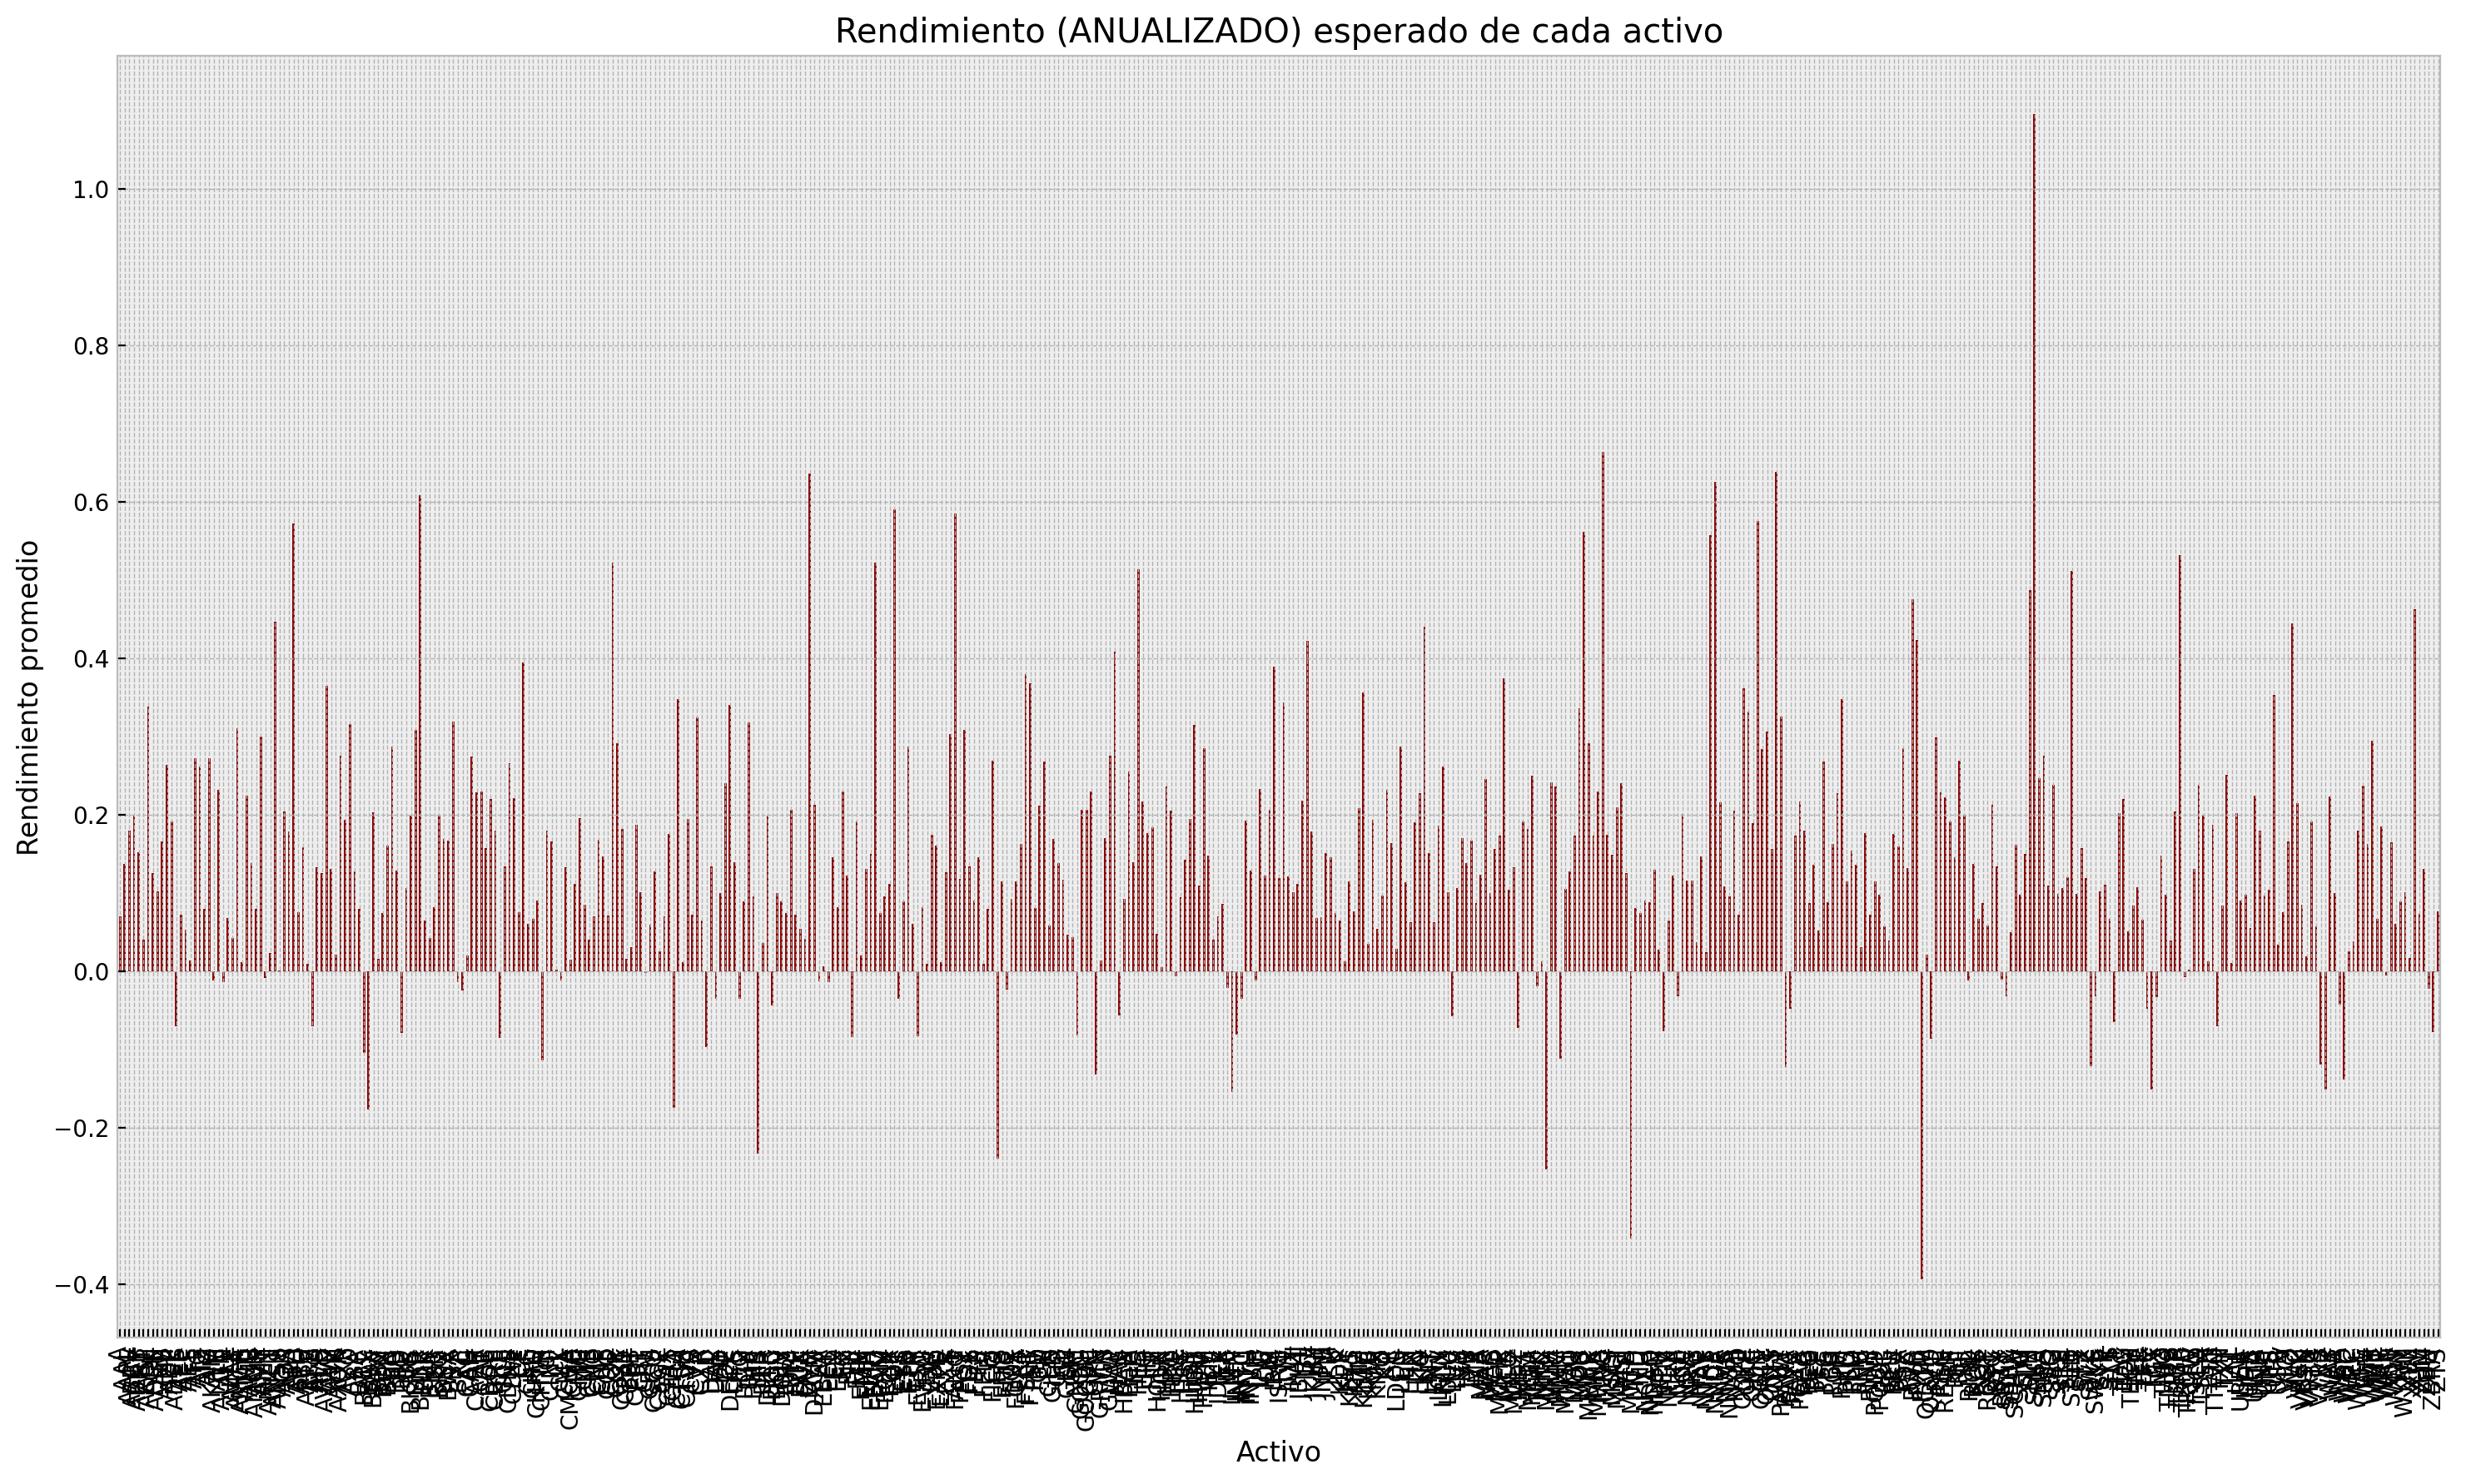

In [48]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
plt.style.use('seaborn-dark-palette')

rendimientos_anualizados.plot(figsize=(18, 10),
                              # Tipo de gráfica
                              kind="bar",
                              title="Rendimiento (ANUALIZADO) esperado de cada activo",
                              xlabel="Activo",
                              ylabel="Rendimiento promedio",
                              color="darkred")

En la tabla anterior, podemos ver todos los rendimientos medios de las empresas que cotizan en el S&P 500. Podemos ver que existen unas que han tenido rendimientos históricos, mayores a los que a tenido otros, por eso nosotros discriminamos la información, para obtener tan solo el Top 10.

In [50]:
# Creamos una tabla de la info. anterior
rendimientos_completos = pd.DataFrame(rendimientos_anualizados)
rendimientos_completos

,0
Ticker,
A,0.070397
AAL,0.137408
AAPL,0.179895
ABBV,0.198404
ABNB,0.151686
...,...
XYL,0.073715
YUM,0.130474
ZBH,-0.022601


In [51]:
# Cambiamos el nombre de nuestra unica columna.
rendimientos_completos =  rendimientos_completos.rename(columns={0: "Rendiemiento anualizado"})
rendimientos_completos

,Rendiemiento anualizado
Ticker,
A,0.070397
AAL,0.137408
AAPL,0.179895
ABBV,0.198404
ABNB,0.151686
...,...
XYL,0.073715
YUM,0.130474
ZBH,-0.022601


In [52]:
# Acomodamos de mayor a menor.
rendimientos_completos.sort_values(by="Rendiemiento anualizado", inplace=True, ascending=False)
rendimientos_completos

,Rendiemiento anualizado
Ticker,
SMCI,1.095130
MRO,0.663201
OXY,0.637923
DVN,0.636478
NVDA,0.625848
...,...
DIS,-0.232605
FIS,-0.239780
MKTX,-0.253586


<Axes: title={'center': 'Rendimiento (ANUALIZADO) esperado de cada activo'}, xlabel='Activo', ylabel='Rendimiento promedio'>

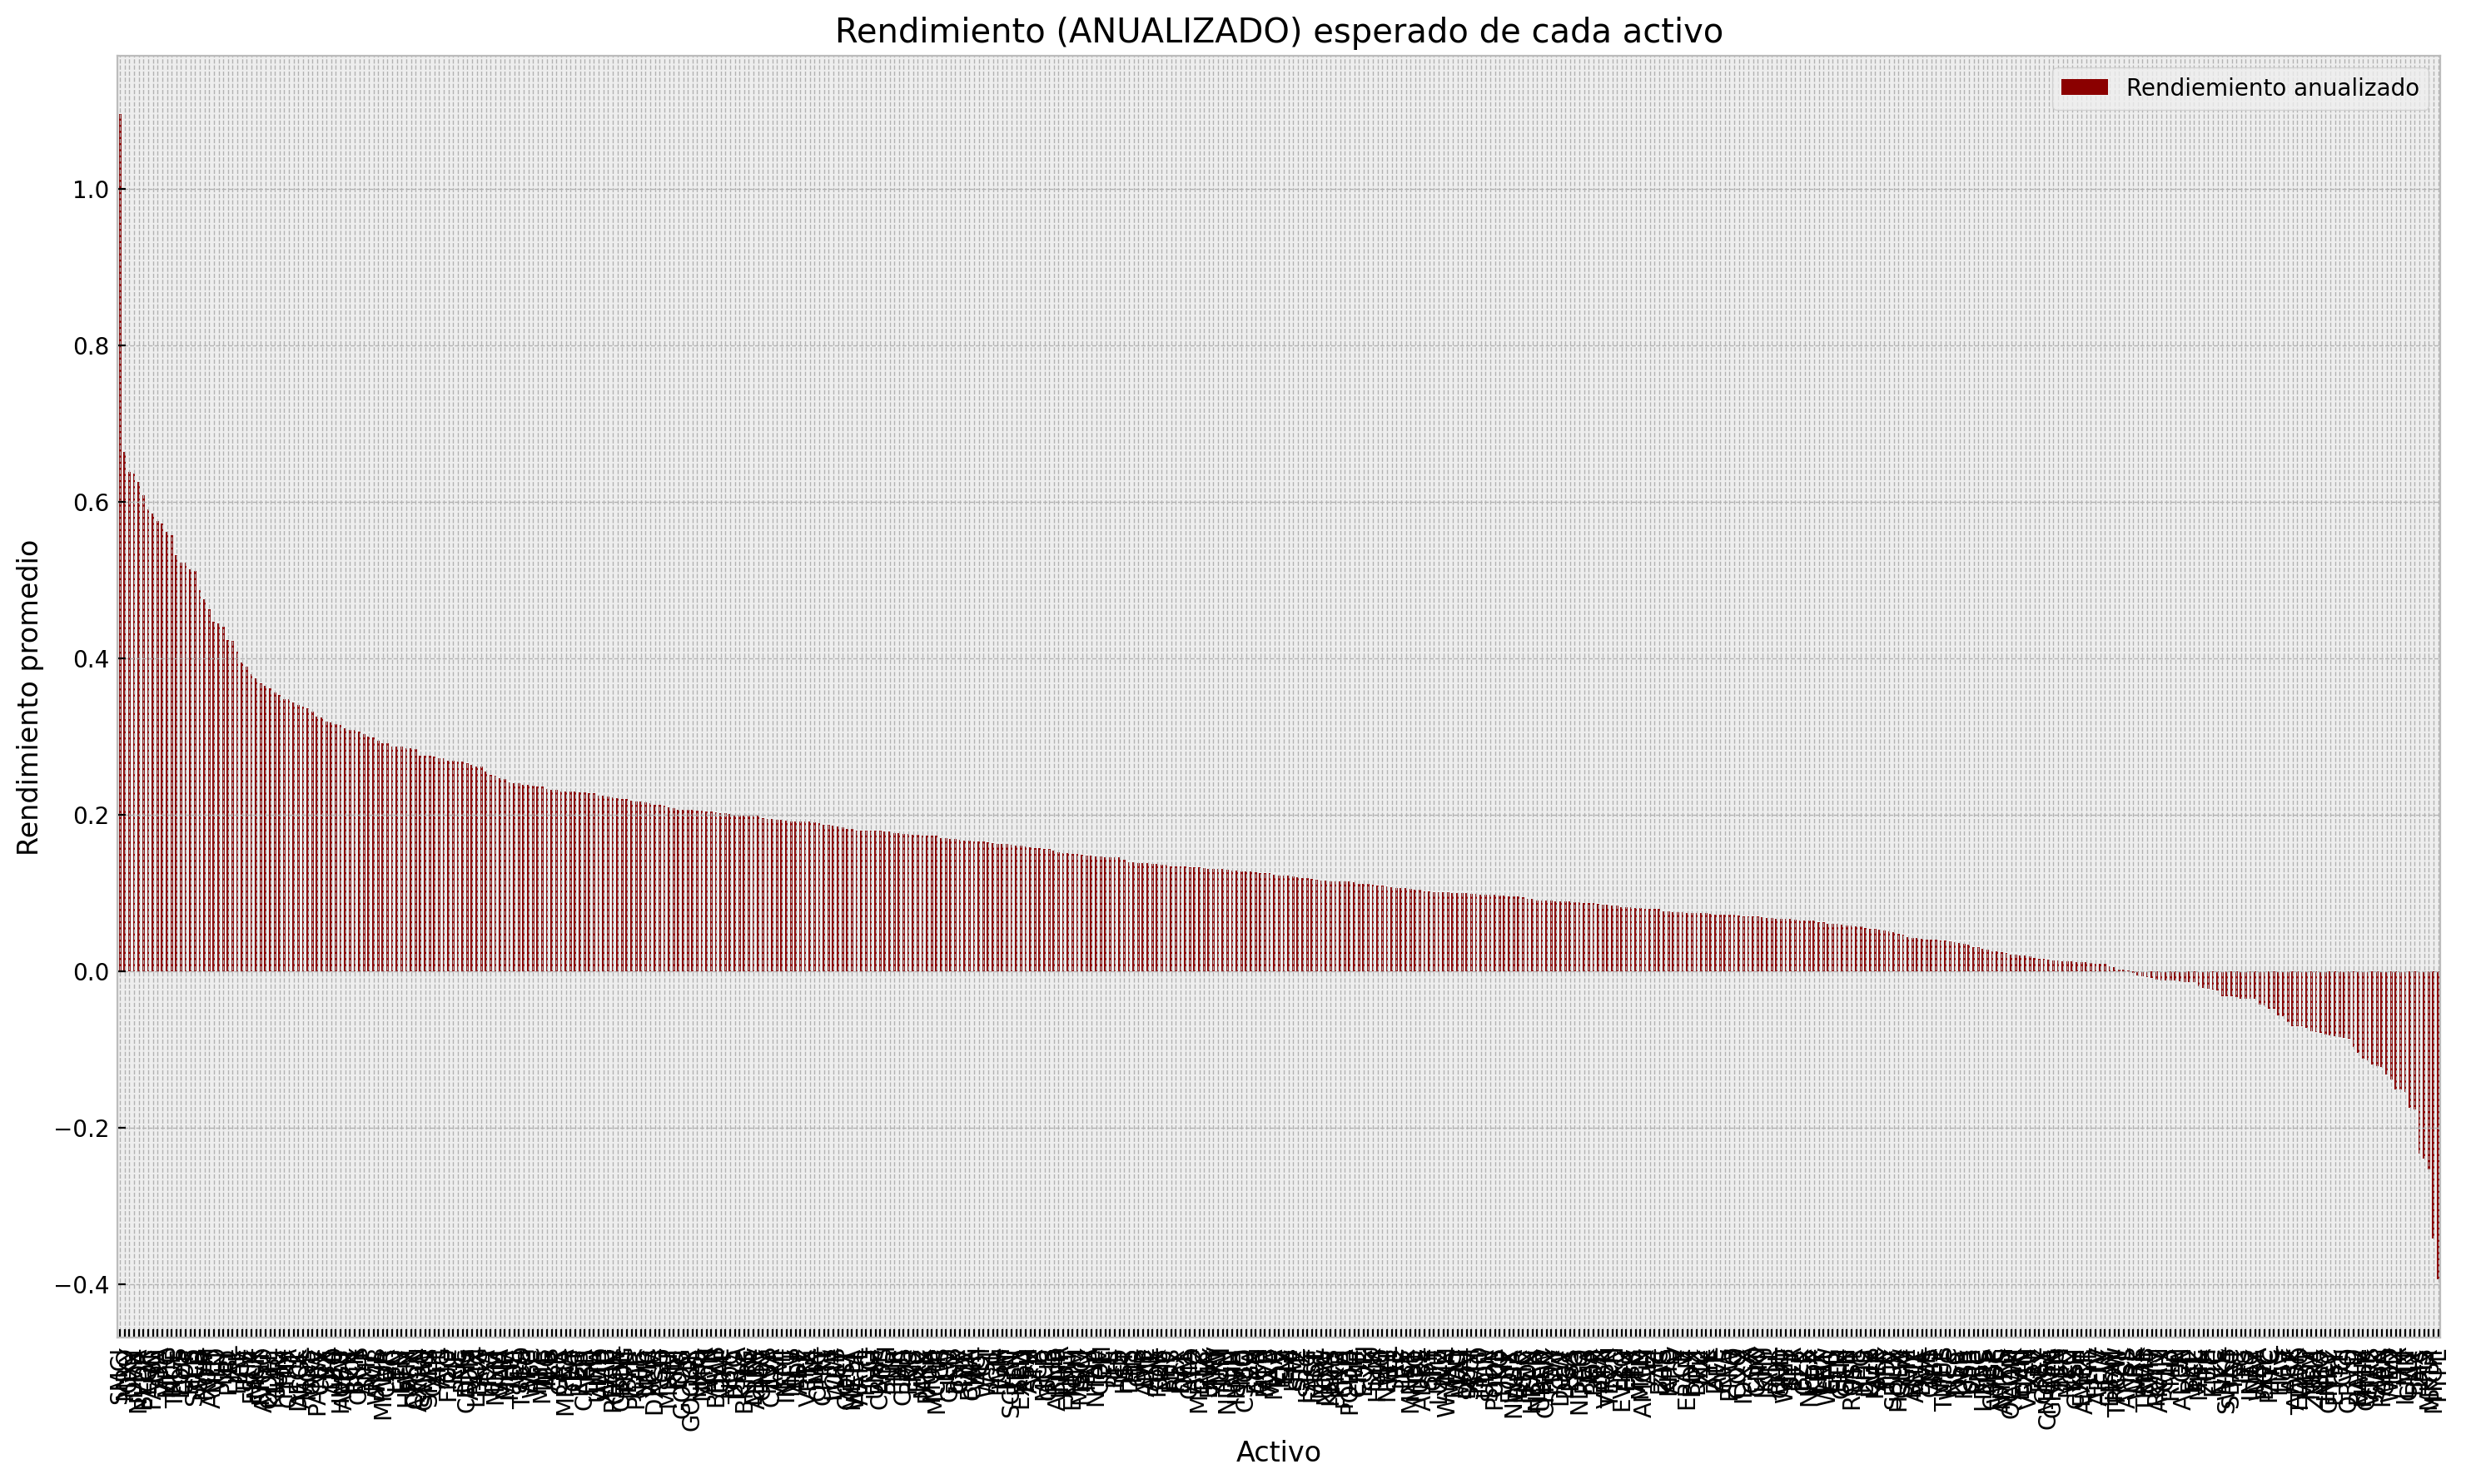

In [55]:
# Gráficamos la tabla
%config InlineBackend.figure_format='retina'
%matplotlib inline
plt.style.use('bmh')

rendimientos_completos.plot(figsize=(18, 10),
                              kind="bar",
                              title="Rendimiento (ANUALIZADO) esperado de cada activo",
                              xlabel="Activo",
                              ylabel="Rendimiento promedio",
                              color="darkred")

<Axes: title={'center': 'Rendimiento (ANUALIZADO) medio esperado de cada activo'}, xlabel='Activo', ylabel='Rendimiento promedio'>

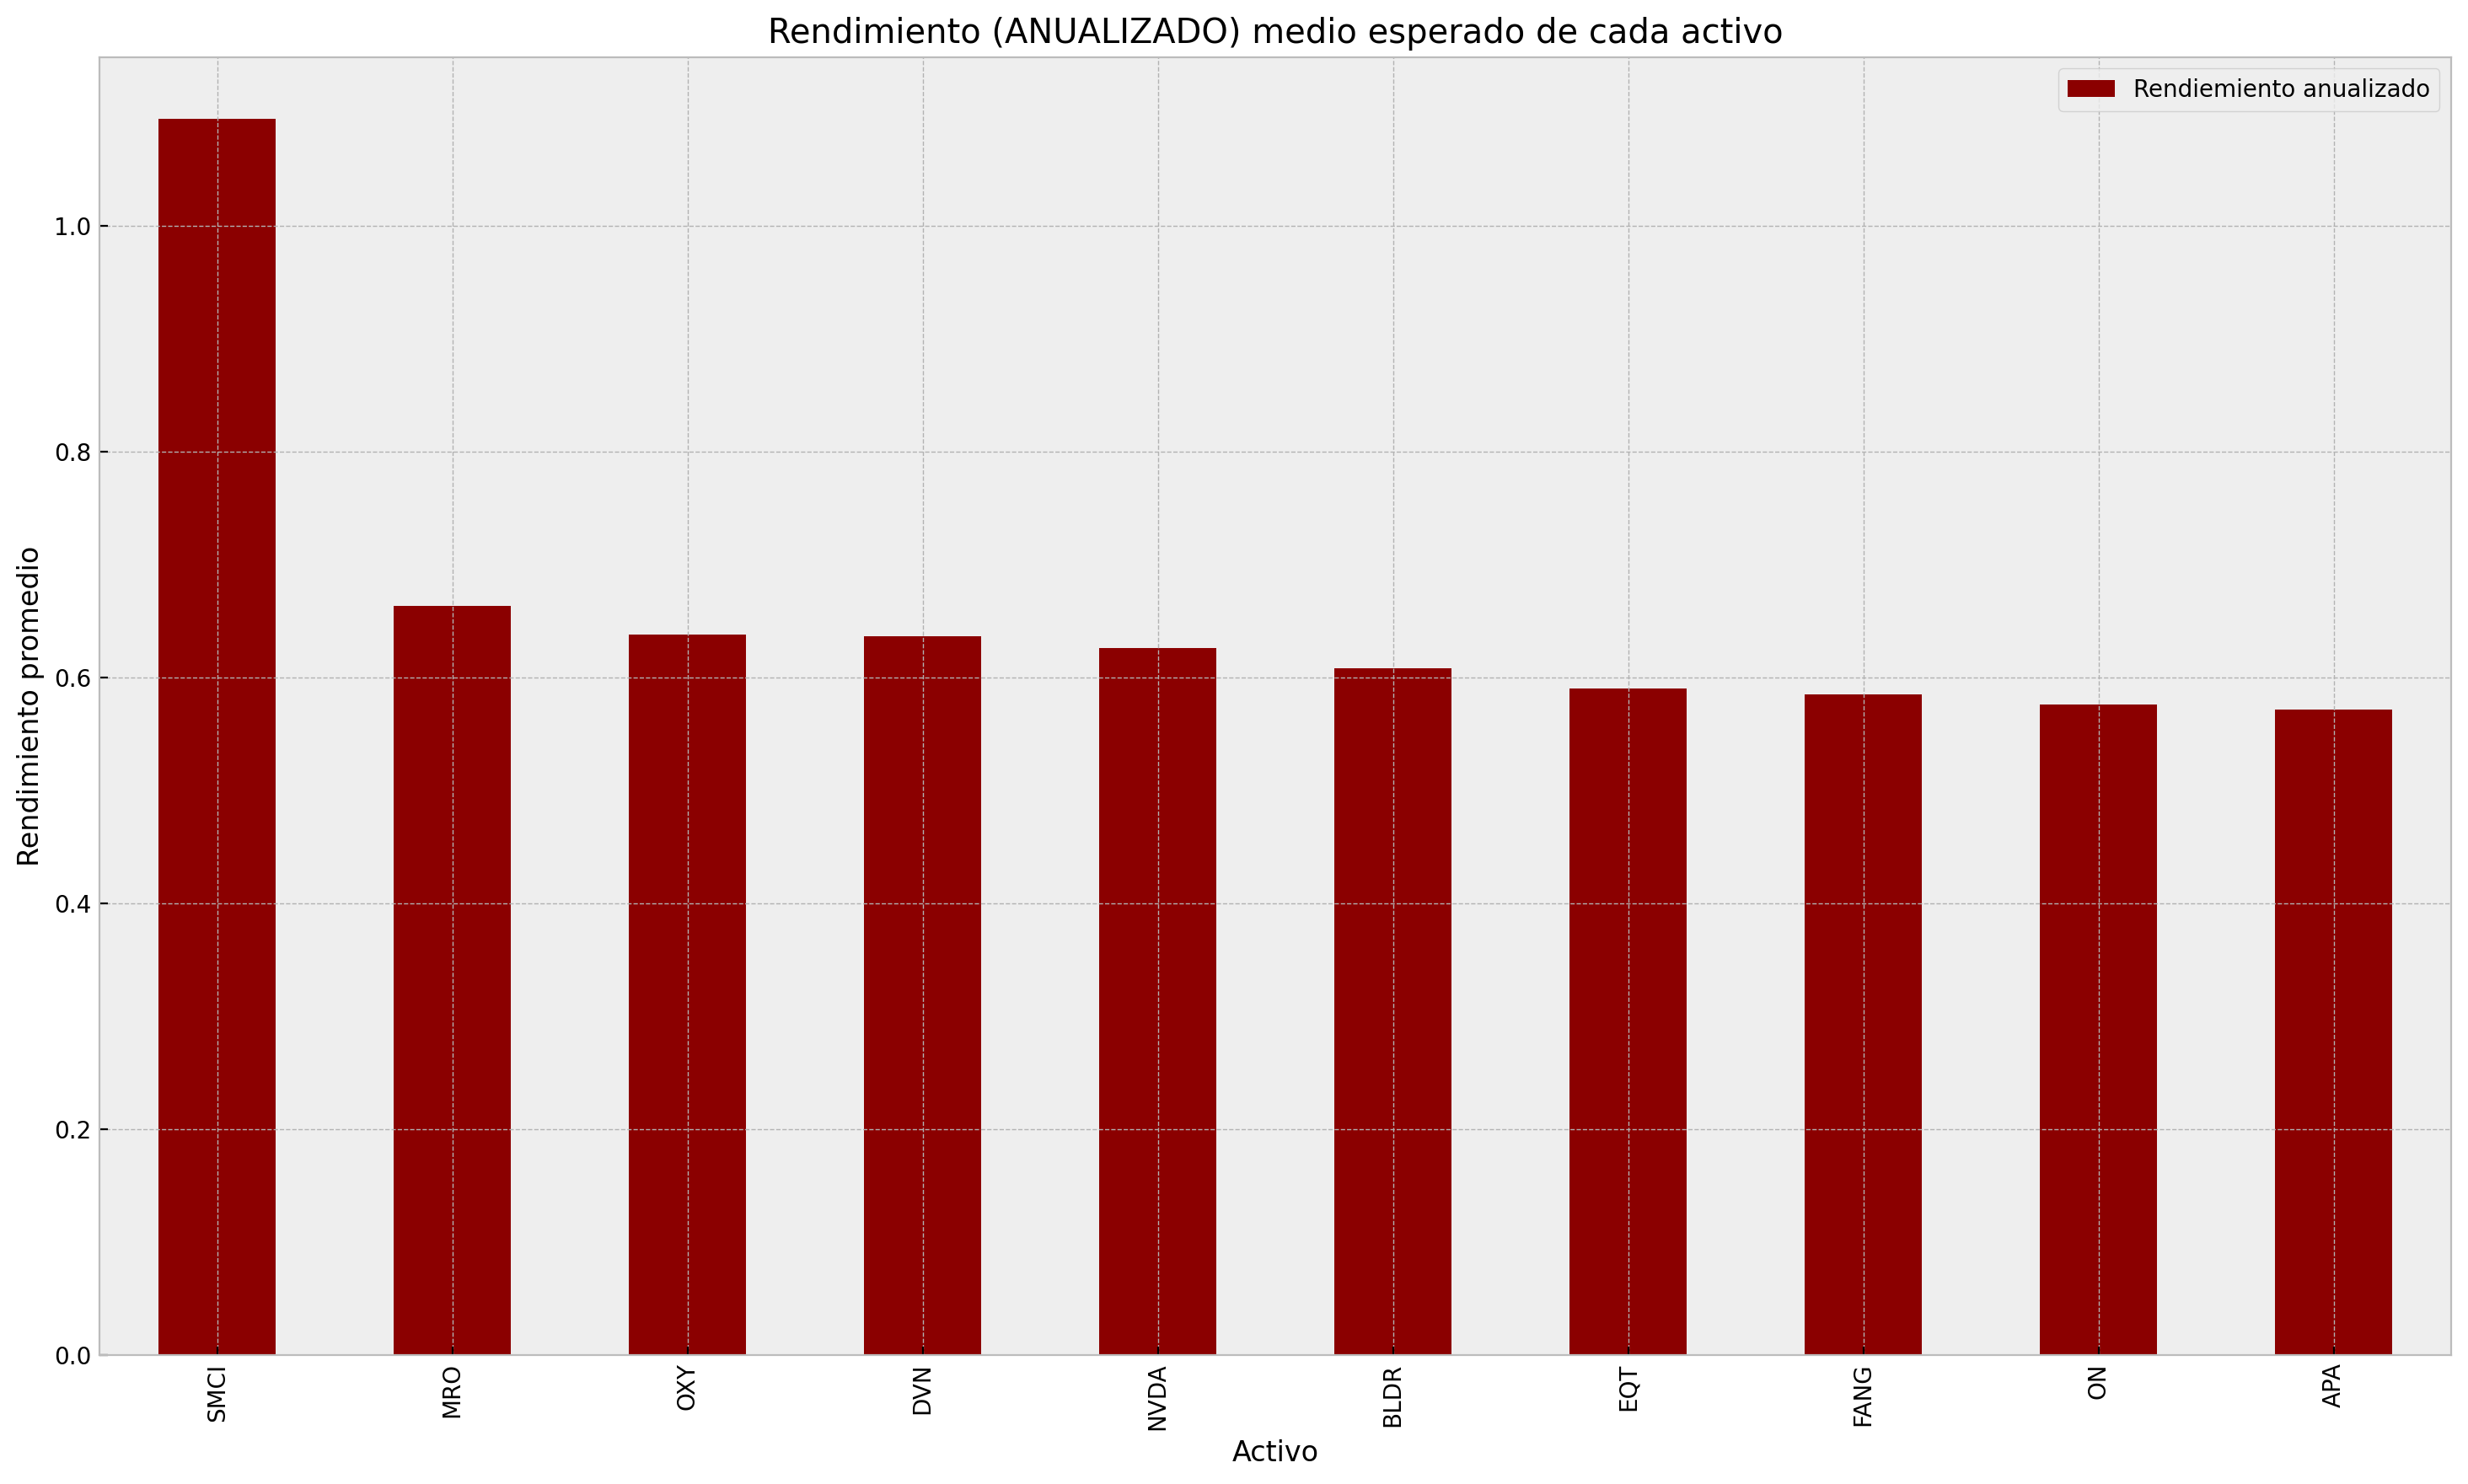

In [56]:
# De la tabla creada sacamos el Top 10.
rendimiento_Top10=rendimientos_completos.head(n=10)
# Y lo gráficamos.
rendimiento_Top10.plot(figsize=(18, 10),
        kind="bar",
        title="Rendimiento (ANUALIZADO) medio esperado de cada activo",
         xlabel="Activo",
         ylabel="Rendimiento promedio",
         color="darkred")

In [57]:
# Convertimos los valores de la tabla en una lista.
index_list = rendimiento_Top10.index.tolist()
index_list

['SMCI', 'MRO', 'OXY', 'DVN', 'NVDA', 'BLDR', 'EQT', 'FANG', 'ON', 'APA']

In [58]:
# De la tabla de precios sacamos los precios de la lista anterior.
outperformers10_SP=SP_prices.filter(index_list)
outperformers10_SP.dropna()
outperformers10_SP

Ticker,SMCI,MRO,OXY,DVN,NVDA,BLDR,EQT,FANG,ON,APA
Date,,,,,,,,,,
2021-01-04,31.049999,6.510832,17.016056,13.121273,130.833984,39.830002,12.917391,41.852425,32.669998,13.973107
2021-01-05,31.160000,7.101861,18.732288,14.121843,133.739792,39.700001,13.524248,45.897419,33.220001,15.307033
2021-01-06,31.889999,7.149524,19.502645,14.902775,125.855431,40.939999,14.410454,48.163647,34.060001,15.931421
2021-01-07,32.189999,7.330645,20.058468,15.106140,133.133667,42.389999,14.391186,48.565582,35.360001,16.186855
2021-01-08,31.879999,7.197188,19.580652,14.731948,132.462738,40.169998,13.986616,48.539925,35.520000,15.685452
...,...,...,...,...,...,...,...,...,...,...
2023-07-31,330.269989,25.933308,62.530060,52.058720,467.188538,144.429993,41.681858,141.003799,107.750000,39.928192
2023-08-01,337.559998,25.844461,62.044716,51.750221,464.968994,146.759995,41.177876,141.539795,108.089996,39.681660
2023-08-02,319.609985,25.380484,60.885834,47.951866,442.593872,148.639999,40.377441,140.496521,103.570000,38.468723


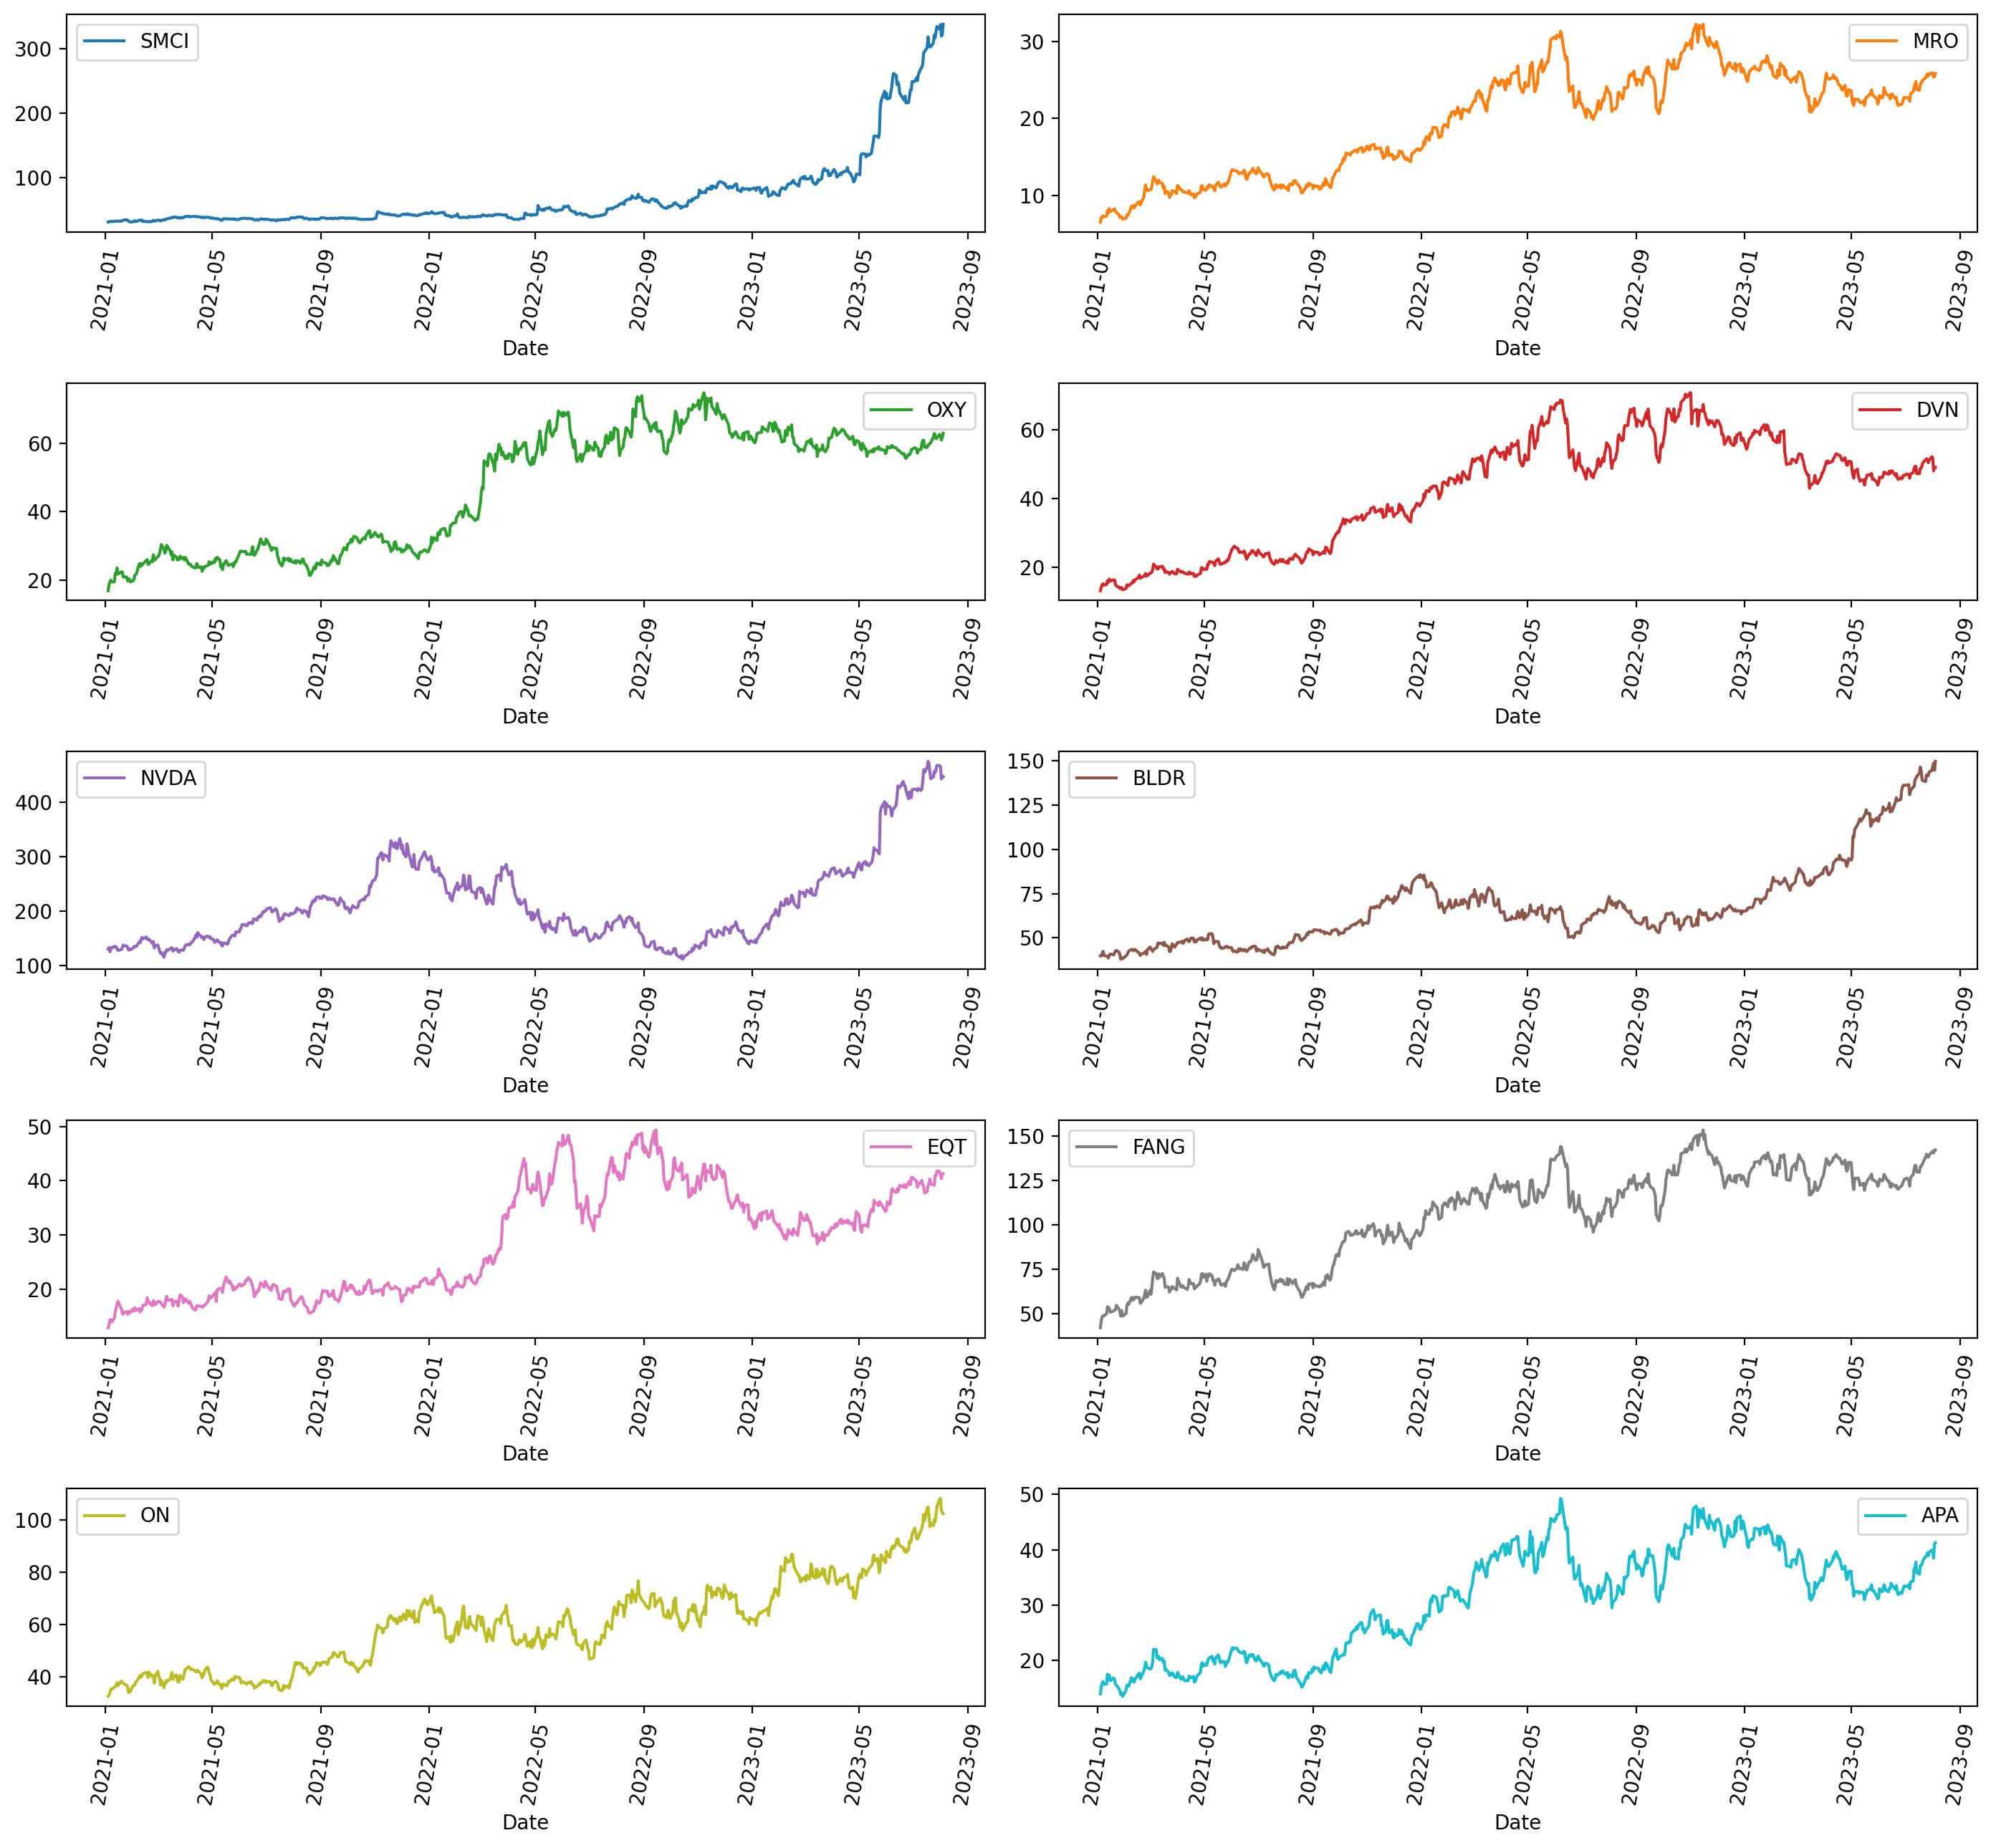

In [59]:
# Los gráficamos.
%config InlineBackend.figure_format='retina'
plt.style.use('default')

fig, a = plt.subplots(5, 2, figsize=(14, 13), tight_layout=True)
%config InlineBackend.figure_format='retina'

outperformers10_SP.plot(ax=a, subplots=True, rot=80);

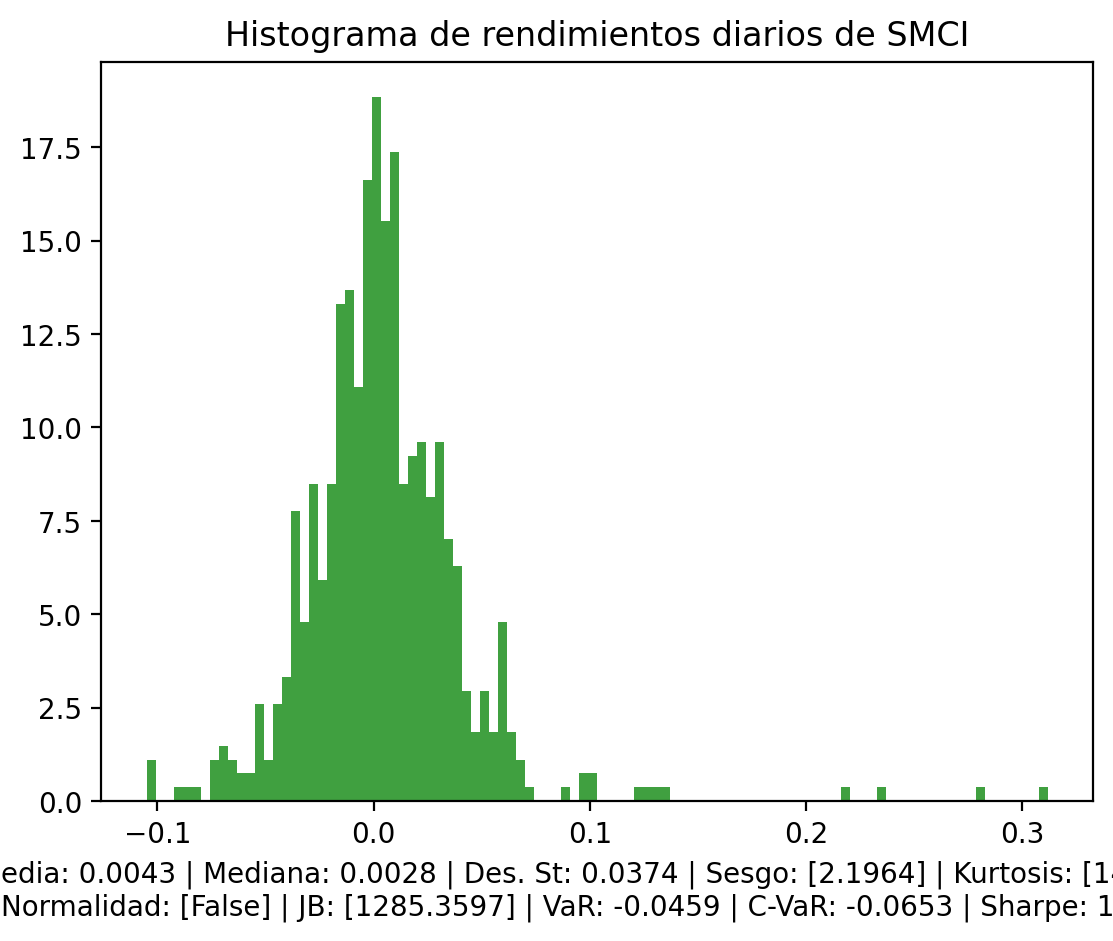

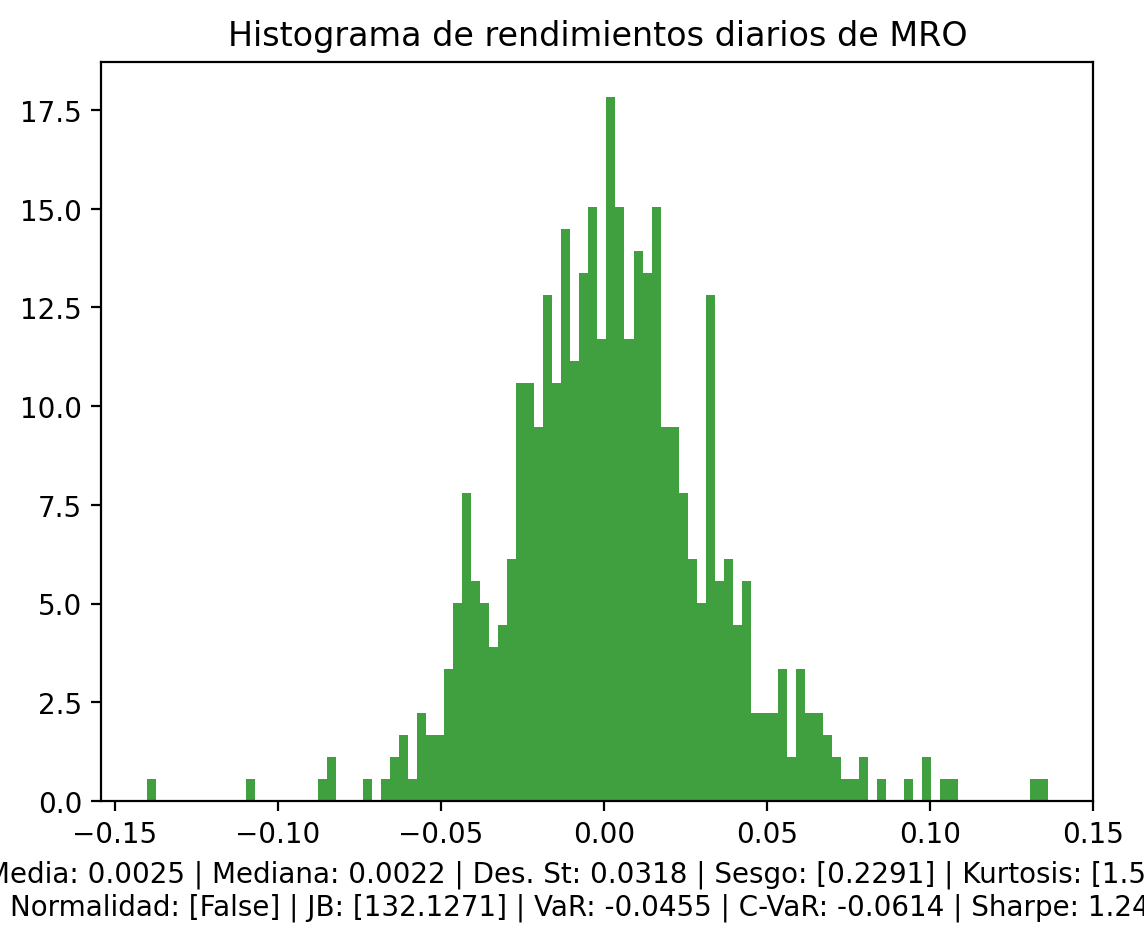

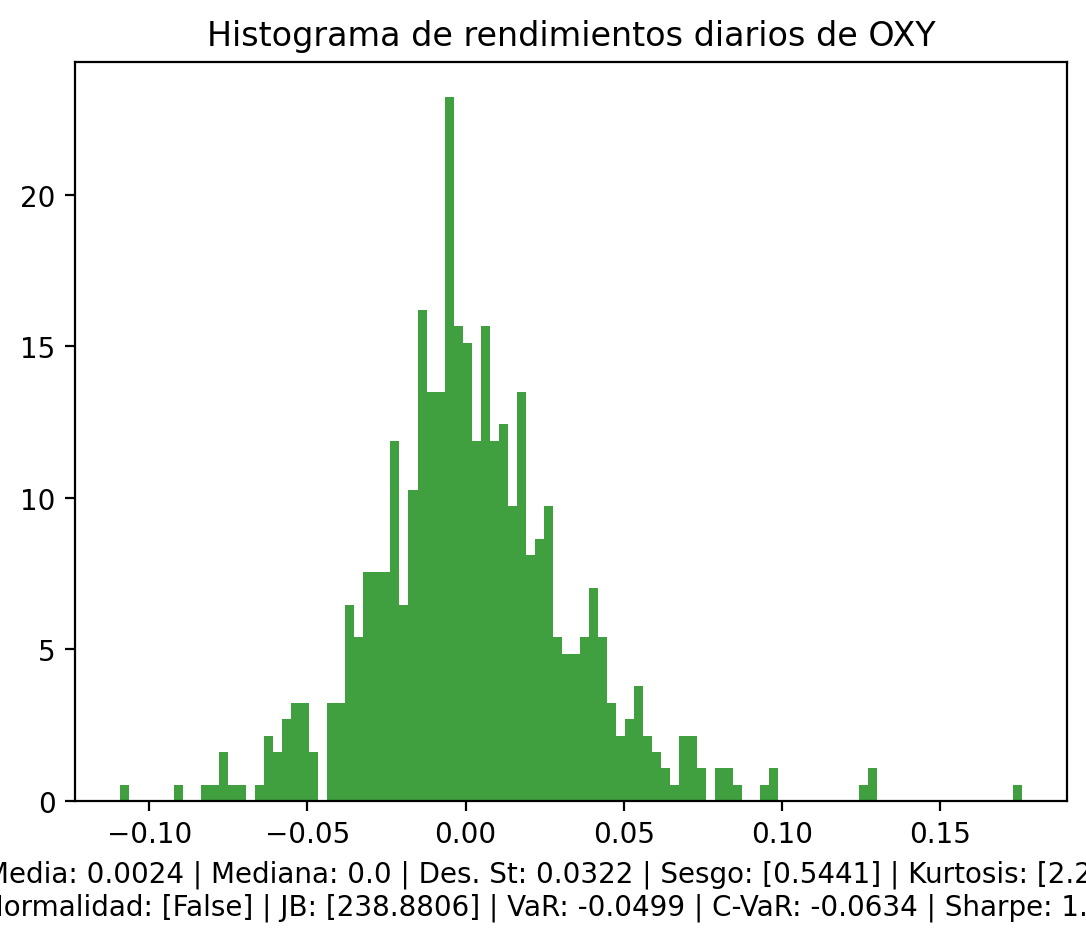

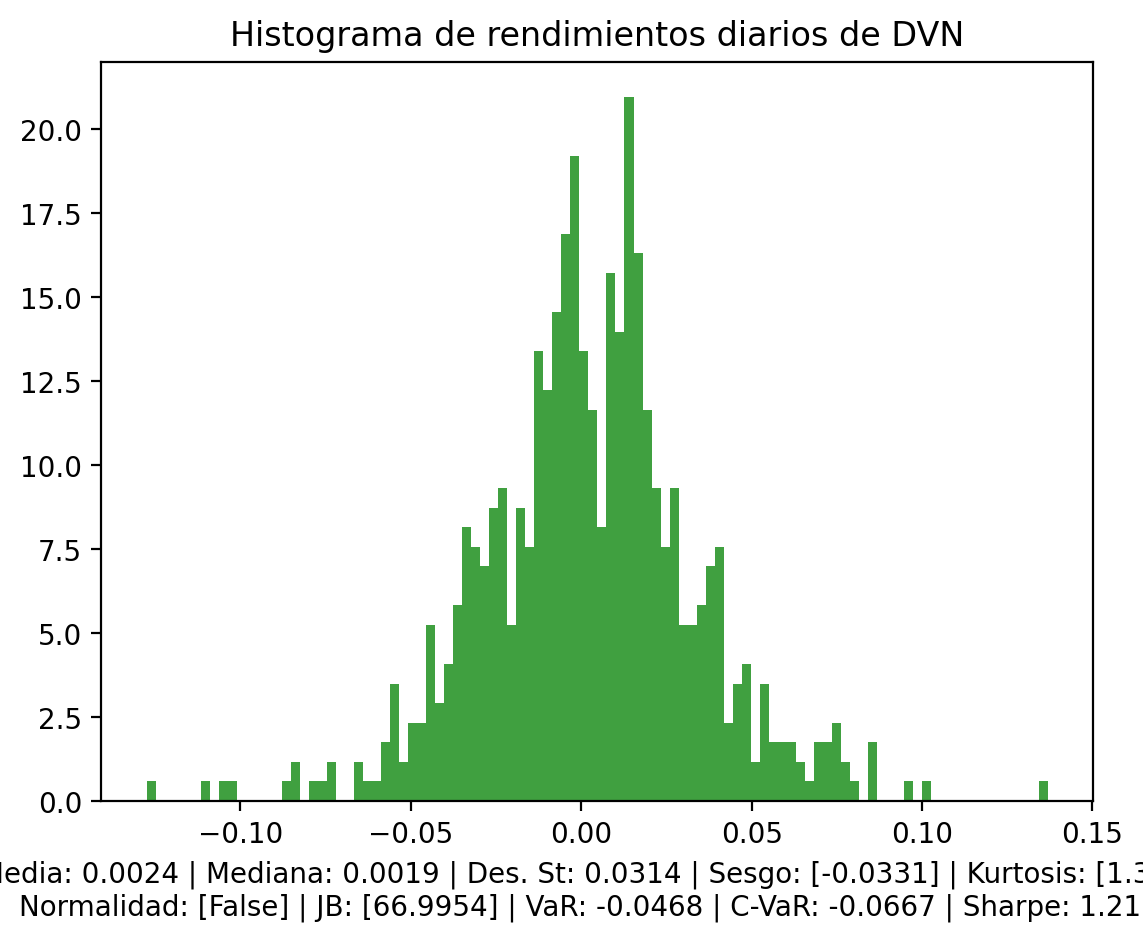

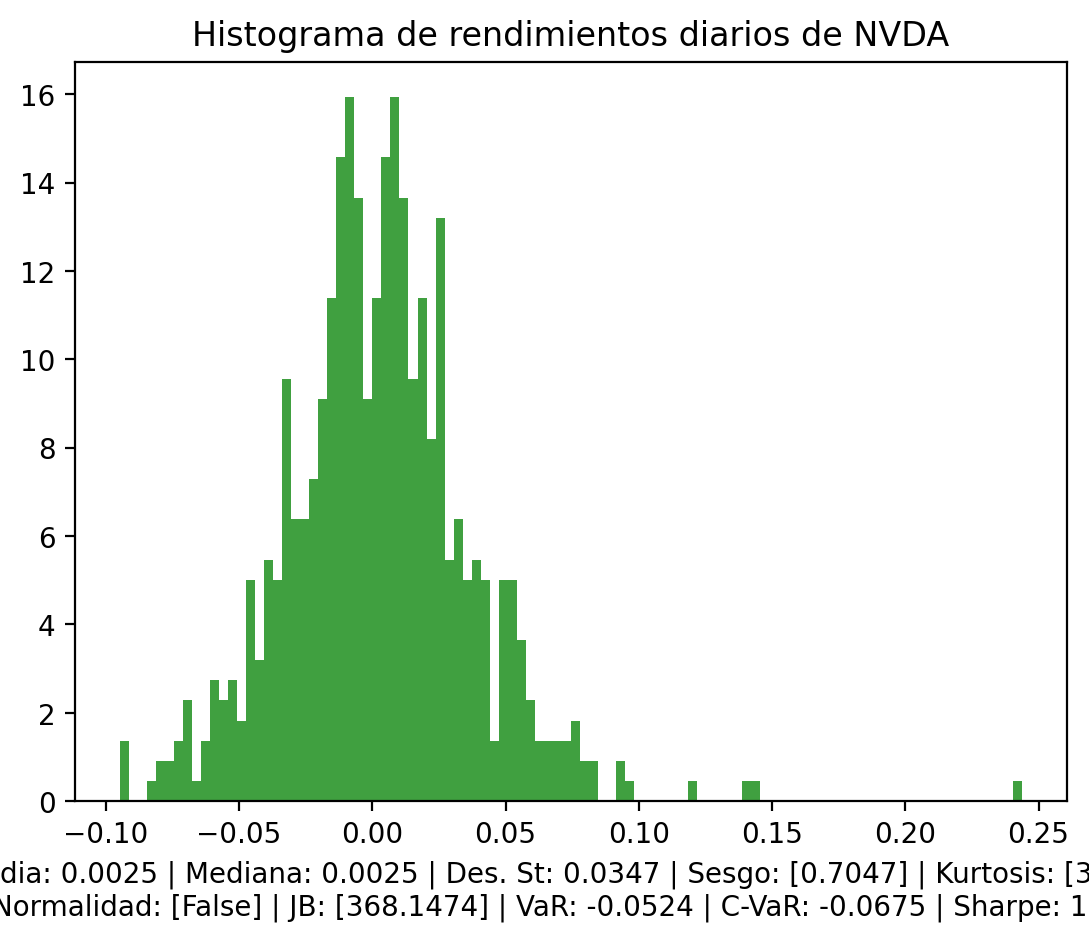

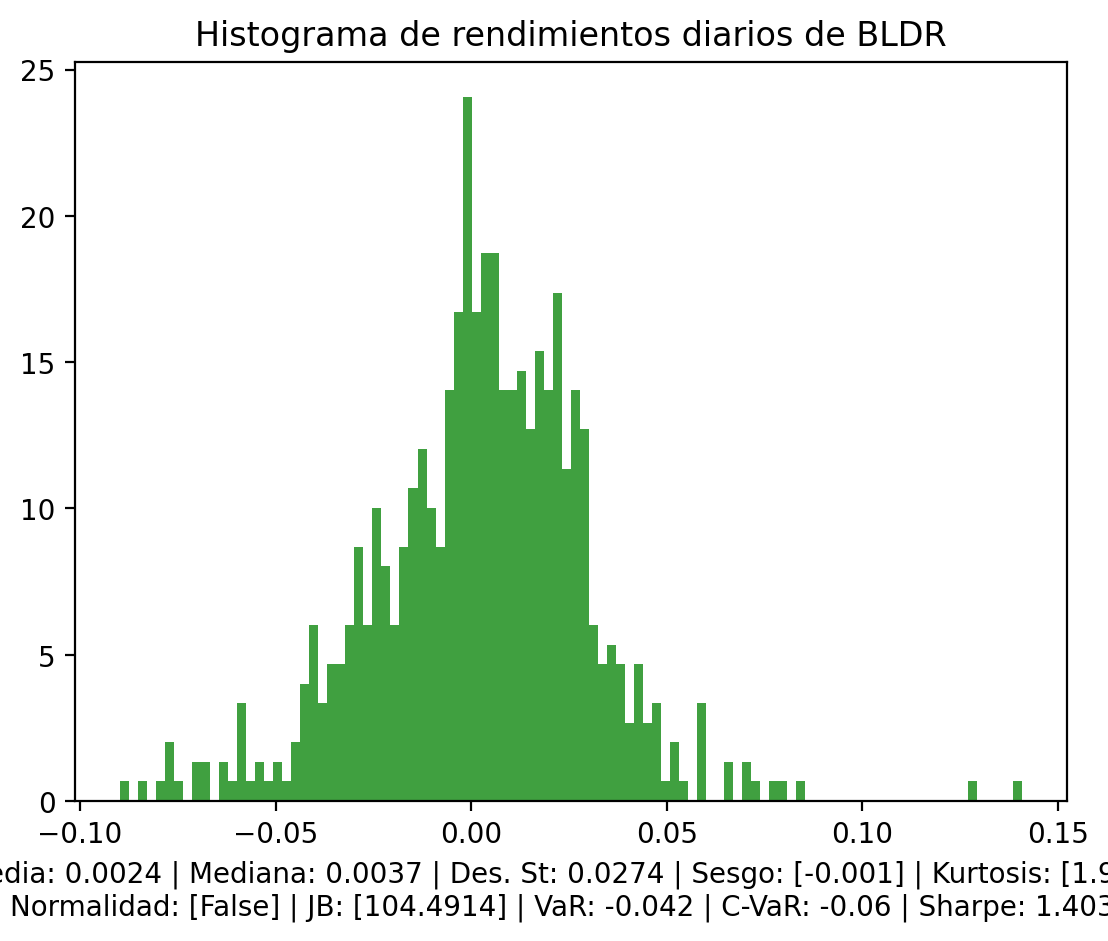

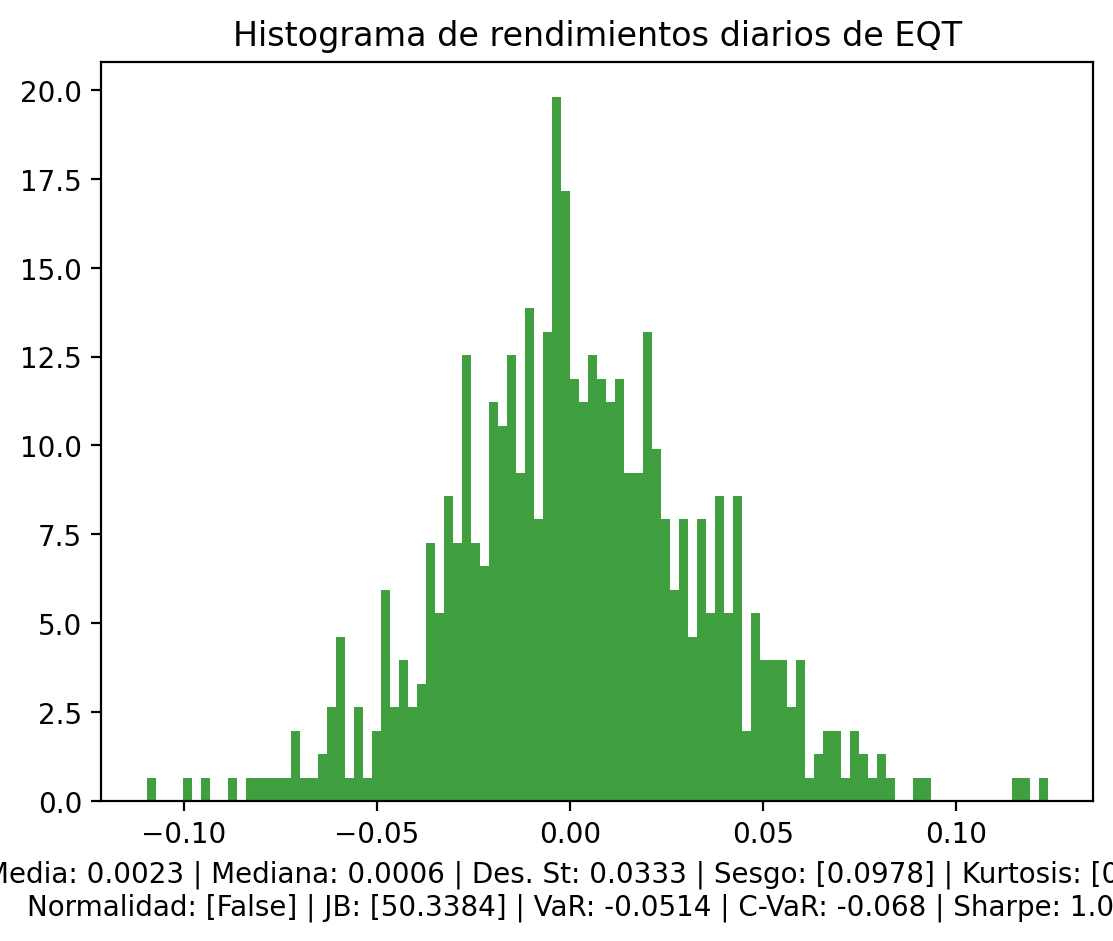

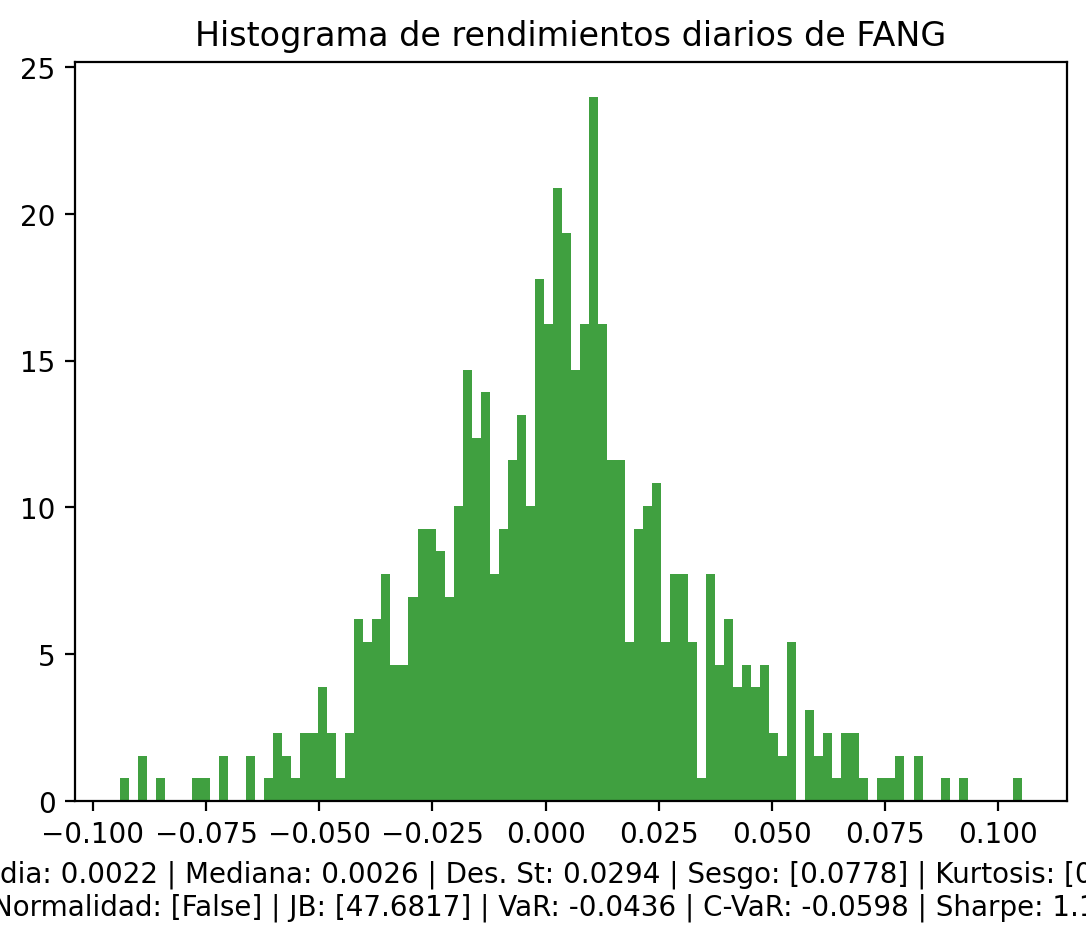

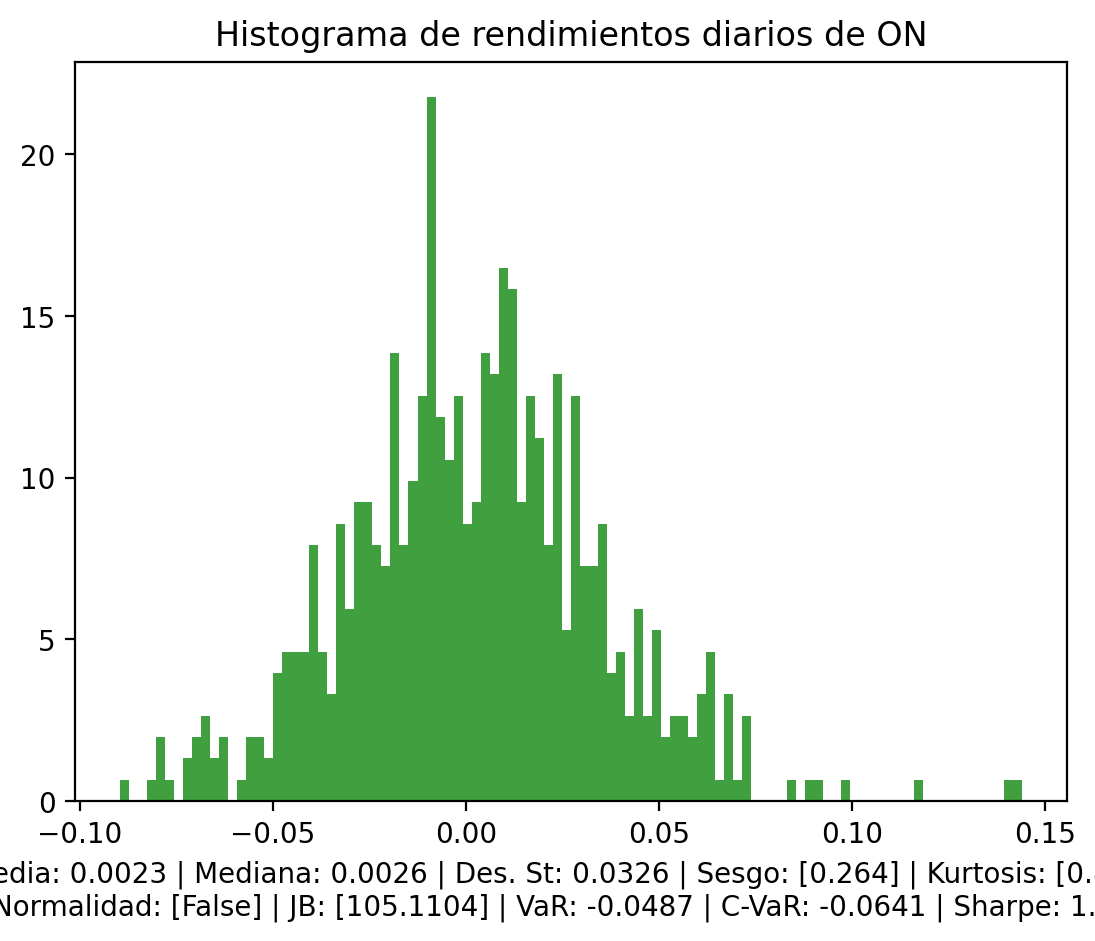

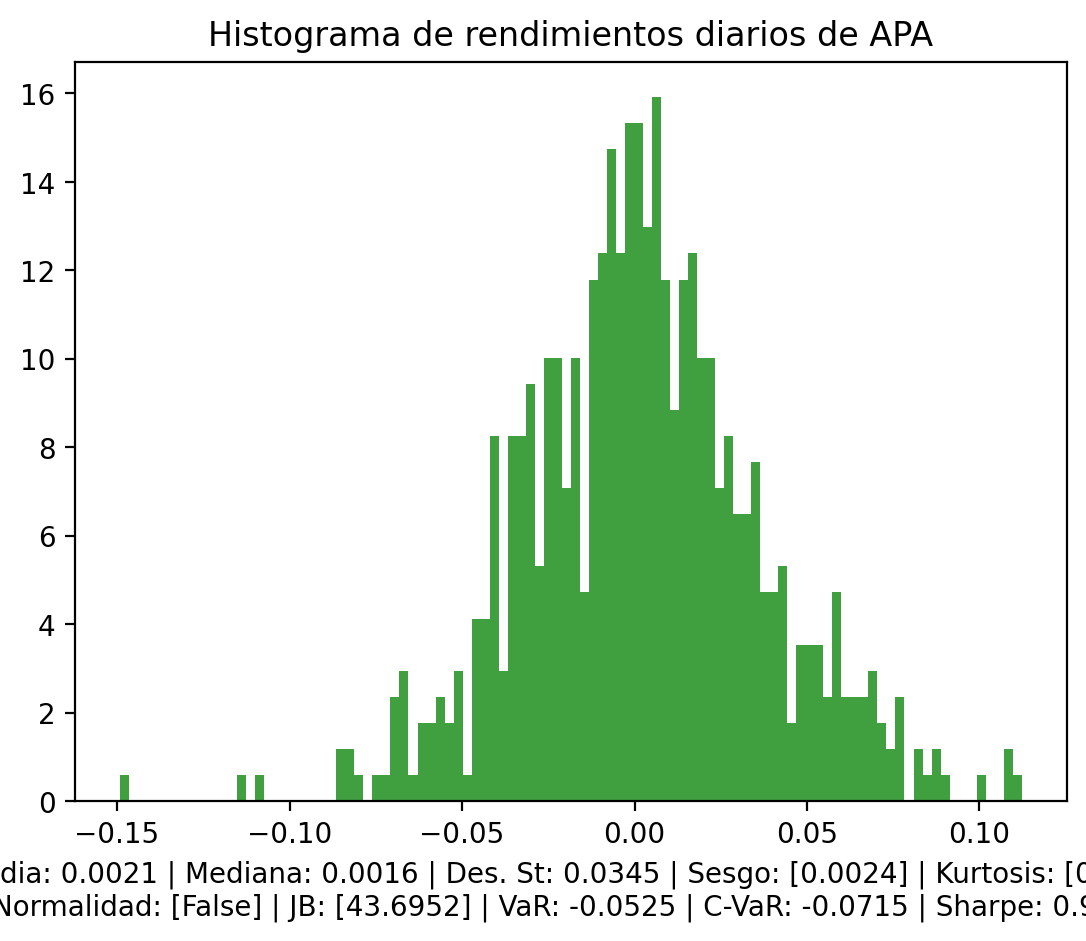

In [60]:
# Por último sacamos la información estadística de estos activos.
from scipy.stats import skew, kurtosis, chi2

rendimientos_outperformers10=outperformers10_SP.pct_change().dropna()
consolidado = rendimientos_outperformers10

def Histogramas(VariableR):
    x = consolidado[VariableR].iloc[1:].to_numpy().reshape(-1, 1)
    x_mean, x_median, x_std, x_skew, x_kurt = np.mean(x), np.percentile(x, 50), np.std(x), skew(x), kurtosis(x)
    x_size = len(x)
    JB = x_size / 6 * (x_skew * 2 + 0.25 * x_kurt * 2)
    GL = 5
    p_value = 1 - chi2.cdf(JB, df=GL)
    Normalidad = p_value > 0.05
    x_VaR = np.percentile(x, 5)
    C_VaR = np.mean(x[x <= x_VaR])
    SharpeIndex = x_mean / x_std * np.sqrt(252)
    decimales = 4
    str1 = f"Media: {np.round(x_mean, decimales)} | Mediana: {np.round(x_median, decimales)} | Des. St: {np.round(x_std, decimales)} | Sesgo: {np.round(x_skew, decimales)} | Kurtosis: {np.round(x_kurt, decimales)}"
    str2 = f"Normalidad: {Normalidad} | JB: {np.round(JB, decimales)} | VaR: {np.round(x_VaR, decimales)} | C-VaR: {np.round(C_VaR, decimales)} | Sharpe: {np.round(SharpeIndex, decimales)}"
    Particiones = 100
    plt.style.use('default')
    plt.hist(x, bins=Particiones, density=True, facecolor='g', alpha=0.75)
    plt.title(f"Histograma de rendimientos diarios de {VariableR}")
    plt.xlabel(f"{str1}\n{str2}")
    plt.show()

for column in consolidado:
    Histogramas(column)